In [243]:
import shap
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
import joblib
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# shap.initjs()  # notebook环境下，加载用于可视化的JS代码

# 我们先训练好一个XGBoost model
# X,y = shap.datasets.boston()
# model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

load_model = joblib.load('Z:/admin/LXH/lxh_train_code/machine_learning_lxh_copy/randomFroest_param_bc2023/Clinical_RF_0.model')


In [244]:
data=pd.read_csv('Z:/admin/Multi_cancer/BRCA/2023_breast_cancer_feature_lxh_download/Clinical_fea/cuch_clini_cv.csv',header= 0)
#data=pd.read_csv('Z:/admin/LXH/lxh_train_code/machine_learning/fusion_mode_data/fusion/all_fusion/cuch_cv_confusion_8_2.csv',header= 0)
# data2=pd.read_csv('test.csv',header=None,names=names)
data_copy = data.copy()
data.head()

,ID_mean,mutation,age,stage,grade,subtype
0,13-15520-06_yangzhongqiong,1,45,3,1,2
1,17-02184-06-sunjun-HE-zhongwu,0,39,2,2,1
2,17-02184-08-sunjun-HE-zhongwu,0,39,2,2,1
3,18-13302-09-heshuqiong-HE-zhongwu,0,51,4,1,1
4,19-02869-15-yezelan-HE-zhongwu,0,65,2,2,2


In [246]:
column_headers = list(data_copy.columns.values)
column_headers

features_name = column_headers[2:]
features_name

['age', 'stage', 'grade', 'subtype']

In [247]:
slide_name = data_copy.iloc[:,0]
slide_name

0               13-15520-06_yangzhongqiong
1            17-02184-06-sunjun-HE-zhongwu
2            17-02184-08-sunjun-HE-zhongwu
3        18-13302-09-heshuqiong-HE-zhongwu
4           19-02869-15-yezelan-HE-zhongwu
                      ...                 
197     23-09459-12_longdehui_zuoruzhongwu
198     23-16980-7_lichunlian_zuoruzhongwu
199    23-10869-6_wangxiaoxia_zuoruzhongwu
200         23-17636-7_chenyu_zuoruzhongwu
201       23-08453-10_wanmeng_youruzhongwu
Name: ID_mean, Length: 202, dtype: object

In [248]:

x=data_copy.iloc[:,2:]
y=data_copy.iloc[:,1]
x.shape,y.shape


((202, 4), (202,))

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(x)

In [250]:
explainer = shap.TreeExplainer(load_model)
shap_values = explainer.shap_values(features)  # 传入特征矩阵X，计算SHAP值
print(shap_values[1].shape)


(202, 4)


In [251]:
np_shap_values1 = np.array(shap_values[1]) 

In [252]:
# 假设 shap_values 是你的 SHAP 值
shap_values_abs = np.abs(np_shap_values1)
mean_importance = np.mean(shap_values_abs, axis=0)
mean_importance
# # 输出每个特征的平均重要性
# for feature, importance in zip(features, mean_importance):
#     print(f"Feature: {feature}, Mean importance: {importance}")

array([0.10901433, 0.07332859, 0.04154528, 0.05631121])

In [253]:
#importance存储成csv
np_feaname = np.array(features_name).reshape(-1,1)

np_mean_importance = mean_importance.reshape(-1,1)
np_all = np.concatenate((np_feaname,np_mean_importance),axis = 1)

pd_importance = pd.DataFrame(np_all)
pd_importance.to_csv('Z:/admin/Multi_cancer/BRCA/2023_breast_cancer_feature_lxh_download/Clinical_shap_importance_train.csv')

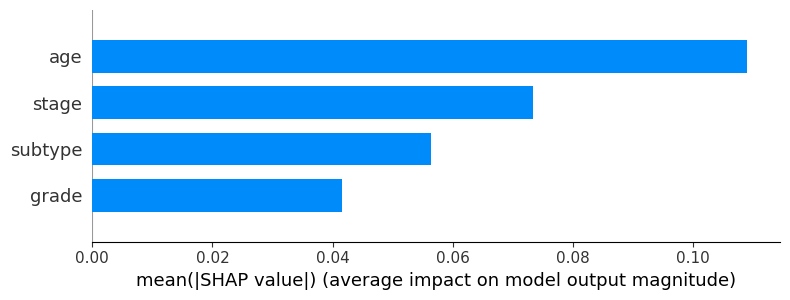

In [254]:
shap.summary_plot(shap_values[1], features, plot_type='bar',max_display = 10,feature_names= features_name)

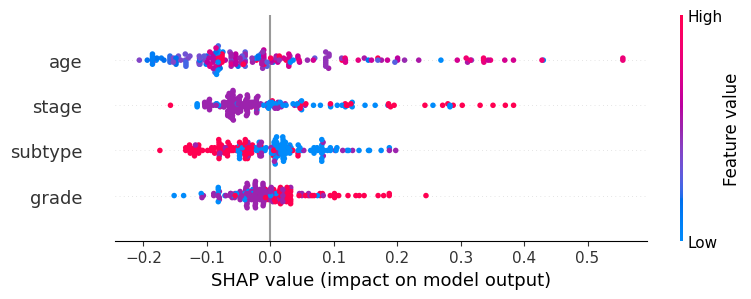

In [255]:
shap.summary_plot(shap_values[1], features,plot_type='dot',max_display = 10,feature_names= features_name)